# **Regressão Linear Múltipla**

In [3]:
import numpy as np
import pandas as pd

In [5]:
cerveja = pd.read_csv('../datasets/consumo_cerveja_1-1.csv', sep=',', encoding='iso-8859-1')

## Passo a Passo para construir um modelo de Regressão múltipla

* 1 - Definir o problema
* 2 - Coletar Dados
* 3 - Explorar os Dados
* 4 - Preparar os Dados
* 5 - Selecionar Variáveis
* 6 - Construir o Modelo
* 7 - Avaliar o Modelo
* 8 - Interpretar os Resultados

## Análise inicial

**Queremos criar um modelo de regressão linear múltipla para prever o consumo de cerveja tendo como variáveis independente as condições climáticas e temporais.**

In [6]:
cerveja.head(5)

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [7]:
cerveja.columns

Index(['Data', 'Temperatura_Media', 'Temperatura_Minima', 'Temperatura_Maxima',
       'Precipitacao', 'Final_de_Semana', 'Consumo'],
      dtype='object')

In [8]:
cerveja.shape

(365, 7)

In [9]:
pd.options.display.float_format = '{:.2f}'.format

In [10]:
cerveja.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


In [11]:
cerveja.isnull().sum()

Data                  0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitacao          0
Final_de_Semana       0
Consumo               0
dtype: int64

In [12]:
cerveja.dtypes

Data                   object
Temperatura_Media     float64
Temperatura_Minima    float64
Temperatura_Maxima    float64
Precipitacao          float64
Final_de_Semana         int64
Consumo               float64
dtype: object

## **Regressão múltipla com statsmodel**

In [13]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [20]:
variaveis = cerveja[['Consumo', 'Temperatura_Maxima', 'Final_de_Semana']]

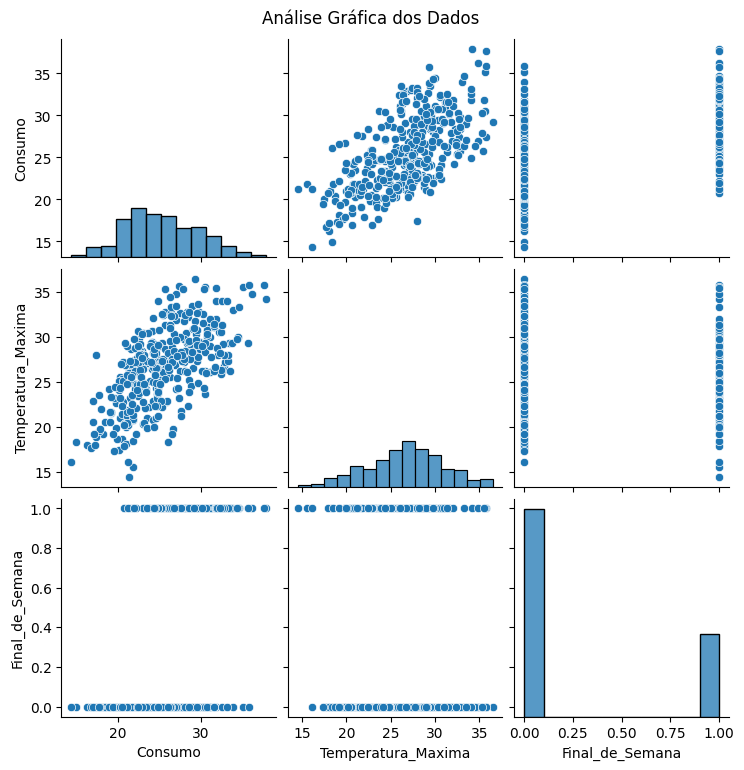

In [23]:
# Análise gráfica - Pairplot
import seaborn as sns
sns.pairplot(variaveis)
plt.suptitle("Análise Gráfica dos Dados", y=1.02)
plt.show()

In [25]:
variaveis.corr()

,Consumo,Temperatura_Maxima,Final_de_Semana
Consumo,1.00,0.64,0.51
Temperatura_Maxima,0.64,1.00,-0.04
Final_de_Semana,0.51,-0.04,1.00


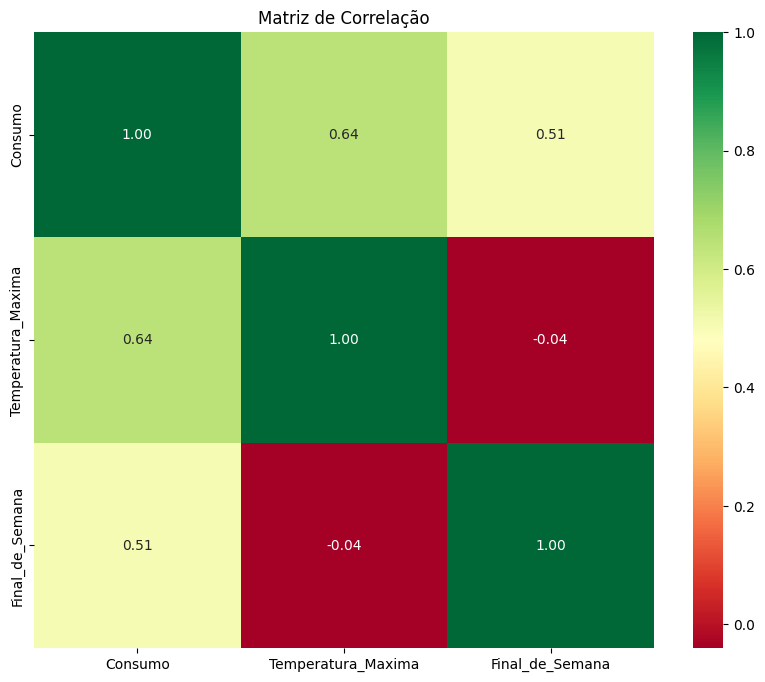

In [26]:
correlation_matrix = variaveis.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [27]:
modelo = smf.ols('Consumo ~ Temperatura_Maxima + Final_de_Semana', data = cerveja).fit()

Criando um vetor com os resíduos

In [28]:
residuos = modelo.resid
residuos

0     -2.45
1      0.39
2     -0.52
3     -0.66
4      3.83
       ... 
360    2.12
361    2.11
362    0.08
363   -0.61
364   -3.09
Length: 365, dtype: float64

### Verificando os pressupostos

### Teste de Normalidade dos resíduos

* Ho = distribuição normal: p > 0.05
* Ha = distribuição != normal: p <= 0.05

In [29]:
import scipy.stats as stats

In [30]:
estatistica, p = stats.shapiro(residuos)

In [36]:
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9883790546593744
p-valor: 0.005213638994497414


Resíduos possuem distribuição normal

In [38]:
import matplotlib.pyplot as plt

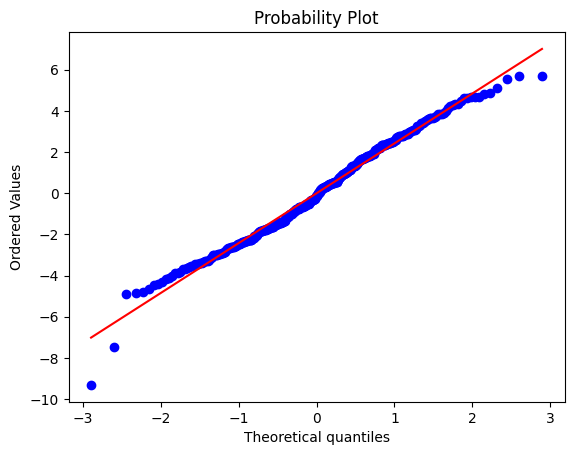

In [39]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.show()

### Análise da Homocedasticidade dos resíduos

(resíduos com variação constante)

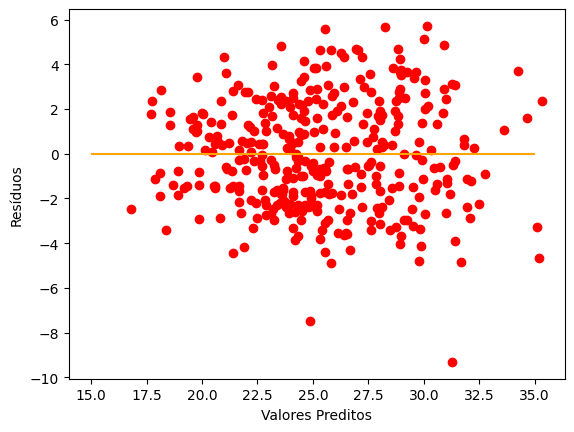

In [46]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=15, xmax=35, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

#### **Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)**

- Ho = existe homocedasticidade: p > 0.05
- Ha = não existe homocedasticidade: p<= 0.05

In [75]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [87]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))


Estatística de teste: 21.516590460218413
p-valor: 2.126824952216928e-05
f-valor: 11.33825612863692
f_p-valor: 1.6746923505412695e-05


In [52]:
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 21.516590460218413
p-valor: 2.126824952216928e-05


**Outliers nos residuos**

In [72]:
outliers = modelo.outlier_test()

In [70]:
outliers.max()

student_resid   2.39
unadj_p         1.00
bonf(p)         1.00
dtype: float64

In [55]:
outliers.min()

student_resid   -3.93
unadj_p          0.00
bonf(p)          0.04
dtype: float64

#### **Ausência de Multicolinearidade**

Somente entre as variáveis **independentes**
* Atenção a valores com r > 0.7
* Considerada multicolinearidade quando r > 0.9

In [56]:
variaveis = cerveja[['Temperatura_Maxima', 'Final_de_Semana']]

In [57]:
correlacoes = variaveis.corr()

In [58]:
correlacoes

,Temperatura_Maxima,Final_de_Semana
Temperatura_Maxima,1.00,-0.04
Final_de_Semana,-0.04,1.00


Usando Fator de Inflação de Variância (VIF)

VIFj = 1/1-Rj^2 

Esse valor deve ser menor que 5!

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [63]:
vif = add_constant(variaveis) # função espera a presença de uma constante na matriz de variáveis **explicativas**
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const                39.87
Temperatura_Maxima    1.00
Final_de_Semana       1.00
dtype: float64

### **Análise do Modelo**

Análise do modelo

* Intercept e Coeficiente
* p_valor para cada coeficiente < 0.05 (estaticamente significativos),
* Adjusted R-squared (explicação do modelo através dos dados).
* p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [64]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     415.1
Date:                Sat, 10 May 2025   Prob (F-statistic):           2.03e-94
Time:                        21:39:12   Log-Likelihood:                -840.61
No. Observations:                 365   AIC:                             1687.
Df Residuals:                     362   BIC:                             1699.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9161      0